
<font size="5"> Creating variables and downloading libriaries  </font>

In [33]:
PROJECT_ID = "clean-sylph-377411"
# Set the project id
! gcloud config set project {PROJECT_ID}

Updated property [core/project].


In [34]:
%%bash
export PROJECT=$(gcloud config list project --format "value(core.project)")
echo "Your current GCP Project Name is: "$PROJECT


Your current GCP Project Name is: clean-sylph-377411


In [35]:
!pip install --user google-cloud-bigquery==3.4.1


In [36]:
import pandas as pd
from google.cloud import bigquery

<font size="4">Creating a dataset in Bigquery</font>

In [37]:
%%bash
# Create a BigQuery dataset for feat_eng if it doesn't exist
datasetexists=$(bq ls -d | grep -w scr)

if [ -n "$datasetexists" ]; then
    echo -e "BigQuery dataset already exists, let's not recreate it."

else
    echo "Creating BigQuery dataset titled: scr"
    
    bq --location=EU mk --dataset \
        --description 'Transactions' \
        $PROJECT:scr
   echo "\nHere are your current datasets:"
   bq ls
fi

W0623 12:12:40.929300 140226700347200 bigquery_client.py:731] There is no apilog flag so non-critical logging is disabled.


Creating BigQuery dataset titled: scr


W0623 12:12:42.399314 140049134421824 bigquery_client.py:731] There is no apilog flag so non-critical logging is disabled.


Dataset 'clean-sylph-377411:scr' successfully created.
\nHere are your current datasets:


W0623 12:12:45.017961 140264637028160 bigquery_client.py:731] There is no apilog flag so non-critical logging is disabled.


  datasetId  
 ----------- 
  agr        
  dataproc   
  kpr        
  logging    
  scr        
  temp       


<font size="4"> Deleting a dataset in Bigquery</font>

In [38]:
! bq rm -f -d scr

W0623 12:13:14.770269 140274879461184 bigquery_client.py:731] There is no apilog flag so non-critical logging is disabled.


In [ ]:
%%bash
# Create a BigQuery dataset for feat_eng if it doesn't exist
datasetexists=$(bq ls -d | grep -w scr)
echo $datasetexists

<font size="4">Creating Cloud Storage bucket</font>

In [39]:
REGION = 'europe-west1-a'
BUCKET_NAME = 'new_bucket_dar'
LOCATION = 'US'

In [40]:
! gsutil mb  gs://{BUCKET_NAME}

Creating gs://new_bucket_dar/...


<font size="4">Creating a bucket in Cloud Store using a python function</font>


In [42]:
from google.cloud import storage
def create_bucket(name):
    storage_client = storage.Client()
    bucket = storage_client.bucket(name)
    bucket.storage_class = "NEARLINE"
    new_bucket = storage_client.create_bucket(bucket, location="us")
    
    return new_bucket


create_bucket('new_bucket_dar')

<Bucket: new_bucket_dar>

In [43]:
! gsutil ls -la

gs://dataproc-staging-europe-west1-939977190002-svj9vud5/
gs://dataproc-temp-europe-west1-939977190002-qath1mhx/
gs://dataproc_mcc_proc/
gs://europe-west1-composer-685142e3-bucket/
gs://europe-west1-composer-9fffa81e-bucket/
gs://new_bucket_dar/



<font size="5">Usuwanie bucketu z Cloud Storage</font>

In [44]:
! gsutil rm -r gs://new_bucket_dar/

Removing gs://new_bucket_dar/...



<font size="5">Tworzenie i usuwanie plików</font>

In [45]:
! touch file.py
! echo "print('Hello DAR')" >> file_python.py

In [46]:
! rm file.py

In [47]:
! python3 file_python.py

Hello DAR


In [ ]:
! rm file_python.py


<font size="5">Korzystanie z BigQuery</font>

In [48]:
%%bigquery
SELECT * FROM `clean-sylph-377411.kpr.t11207_crnt_acct_trx_fcd` where DUE_DT = '2021-10-31'

Query is running:   0%|          |

Downloading:   0%|          |

,crnt_acct_trx_key,due_dt,sys_cd,tech_etl_pkg_cd,tech_insert_id,tech_insert_ts,acct_key,bank_id,kir_branch_id,contract_id,...,sender_acct_key,sender_acct_id,sender_orig_acct_id,sender_nm_address,receiver_acct_key,receiver_acct_id,receiver_orig_acct_id,receiver_nm_address,gcp_etl_pkg_cd,gcp_due_dt
0,DEEZT7QU4TC0000106500V8UY7C9MT0U,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,36V8G4K00RO0000125424PYSNY7W6HWA,1020,1910,200252544,...,78VL3C3Z66ZAF5P23MSSDVQ7PPA654A2,6.22339743290108e+25,4.9588458200366106e+25,adres NaDawcy,HAM1JVXR2NU9XM8BW0AHXPSDEGKO5E8D,2.2262865283490475e+25,2.458078489641657e+25,adres odbiorcy,None,NaT
1,14JSVREAVE6000009771421I4TRRAWOR,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,FSE80V60L370000143989X1SBBNG9O2Z,1020,1910,223950411,...,Z4TAU8285KODNDO21LRBY4GRNE5CJHBH,1.3757732244150529e+25,8.40472153257022e+25,adres NaDawcy,5CUD4YO396IQB6QAXB4GW4Z6Y3XAA6OF,7.941150923413318e+25,2.3330741342044113e+25,adres odbiorcy,None,NaT
2,FEEPC0A8WMC0000084085GGYMOIN1OJ4,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,ALV6VWV1UIU0000031266EBUXBODI3HV,1020,1910,200990713,...,ITHE0ULMR131SB8IJI7QLUBRGEQY6Y5K,1.8145706863990374e+25,7.7232275218506229e+25,adres NaDawcy,K2F91AUREZ1X0MJ3HFVV5SIL98C6CF3F,2.2602642324125118e+25,5.5165413998405507e+25,adres odbiorcy,None,NaT
3,GUMNGZZ8F2S00000440372QVD0DIIUW6,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,ZNS5KMTGM470000072432CJ0ZEPXVCZE,1020,1910,209885981,...,UKIUTD1HH1M2CMAL1KA2QJLU5BH72NWO,2.4674956421108515e+25,9.5774154551116973e+25,adres NaDawcy,MYRS4LMK8VTDNC4E3X62VB9ZXN3D6WKI,7.5263738368549845e+25,3.9661785846257689e+25,adres odbiorcy,None,NaT
4,S0A4YPSK8260000223294N1BO0HK6LE0,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,EV36RD0GX9K00001279427PSJBZZ9SCB,1020,1910,200866251,...,DQSB4CNHNO4OQAZUHSTA6VYFRHX2C31D,2.8965626551132681e+25,7.0343873323905332e+25,adres NaDawcy,H14CIINP8YZYM3TYZGA6AMJODWBFZFFM,5.0741947768683117e+25,8.66683823781185e+25,adres odbiorcy,None,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38331,5HUEE9TEP0Q000023669906OC1IOAHSK,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,171BIU3SKL000000611492PYAJLVU1FS,1020,1910,202947158,...,JTBS4696Q40TR01JCV35I3X3E6V0EH0V,5.2636902533546446e+25,2.618688449513056e+25,adres NaDawcy,9L7F5F81XHCFSV6U2CBE93P8UCWY1GSD,2.6648912422762349e+25,5.5365011368623212e+25,adres odbiorcy,None,NaT
38332,JCD1UO8TPT20000282724MUZSXG0GA8U,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,2P1CWQPGKRG00000250302U74TZ8PODS,1020,1910,203285673,...,KQEGS6W32FQKECX6VJH7ANLJ12I2M6SK,8.2223638609226346e+25,8.1742406992886029e+25,adres NaDawcy,BN3SH0P22Y02SWEVTUTVTO1HCXF9LICJ,8.1355939915635391e+25,2.9531109068795935e+25,adres odbiorcy,None,NaT
38333,6HI4E5N1GMM00001954726SL4MMN055C,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,NZJO0UFYF90000005718116ACBR8CZPO,1020,1910,201945641,...,NYL34GI3V8LKWRCV2BDRSZG9GIRS64OO,8.2408484143564982e+25,1.0935634449633332e+25,adres NaDawcy,PS0D5M527U050FLLNRTN11FP9N82D5M4,2.8173472122076922e+25,9.2505301859934616e+25,adres odbiorcy,None,NaT
38334,60HGENQN66S00000231669QGUBR16EIP,2021-10-31 00:00:00+00:00,OZSI,OHIO_01,1910.000000000,2022-09-30 00:00:00+00:00,7HJKF460YGN0000088138HK4UE9MIXXK,1020,1910,200229096,...,TK4G6MTBI05825NIJWY8YP6ND6AC3XRU,9.6897648267778733e+25,4.4760763495174732e+25,adres NaDawcy,GGC06AKOKS0VJMVV1HYIARMV9PBC00SE,2.8421673432860111e+25,3.8295817713774543e+25,adres odbiorcy,None,NaT


In [49]:
BQ_TABLE = "clean-sylph-377411.t11207_crnt_acct_trx_fcd"

In [50]:
! echo $BQ_TABLE

clean-sylph-377411.t11207_crnt_acct_trx_fcd


In [51]:
bqclient = bigquery.Client(project=PROJECT_ID)

In [52]:


QUERY = f"""SELECT * FROM `kpr.t11207_crnt_acct_trx_fcd` where DUE_DT = '2021-10-31'"""

job = bqclient.query(QUERY)
data = job.to_dataframe()

print(data.head())

                  crnt_acct_trx_key                    due_dt sys_cd  \
0  DEEZT7QU4TC0000106500V8UY7C9MT0U 2021-10-31 00:00:00+00:00   OZSI   
1  14JSVREAVE6000009771421I4TRRAWOR 2021-10-31 00:00:00+00:00   OZSI   
2  FEEPC0A8WMC0000084085GGYMOIN1OJ4 2021-10-31 00:00:00+00:00   OZSI   
3  GUMNGZZ8F2S00000440372QVD0DIIUW6 2021-10-31 00:00:00+00:00   OZSI   
4  S0A4YPSK8260000223294N1BO0HK6LE0 2021-10-31 00:00:00+00:00   OZSI   

  tech_etl_pkg_cd  tech_insert_id            tech_insert_ts  \
0         OHIO_01  1910.000000000 2022-09-30 00:00:00+00:00   
1         OHIO_01  1910.000000000 2022-09-30 00:00:00+00:00   
2         OHIO_01  1910.000000000 2022-09-30 00:00:00+00:00   
3         OHIO_01  1910.000000000 2022-09-30 00:00:00+00:00   
4         OHIO_01  1910.000000000 2022-09-30 00:00:00+00:00   

                           acct_key bank_id kir_branch_id contract_id  ...  \
0  36V8G4K00RO0000125424PYSNY7W6HWA    1020          1910   200252544  ...   
1  FSE80V60L370000143989X1SBBNG9

In [53]:
aggr=data.groupby(['chnl_cd']).size().reset_index(name='counts')
print(aggr)

   chnl_cd  counts
0        +       8
1        3       2
2        7     707
3        8      26
4        A      36
5        B     119
6        C    1895
7        E       8
8        I     290
9        N      38
10       O   35206
11       Z       1


[Text(0.5, 1.0, 'Rozkład transakcji z podziałem na kanał')]

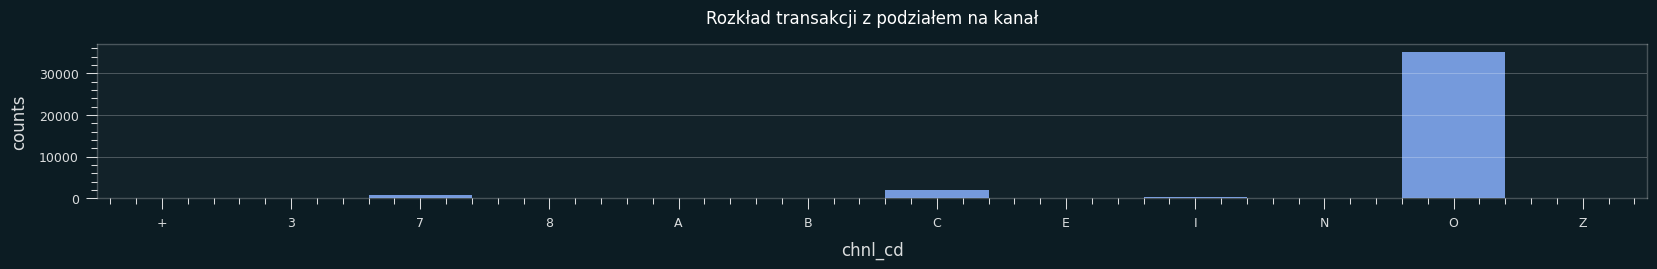

In [54]:
import seaborn as sns
from qbstyles import mpl_style
import matplotlib.pyplot as plt
mpl_style(dark=True)
fig = plt.figure(figsize=(20,2))
sns.barplot(aggr, y='counts', x='chnl_cd', palette=['cornflowerblue','steelblue']).set(title='Rozkład transakcji z podziałem na kanał')

In [55]:
aggr.to_csv('plik.csv')